In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels.api as sm

import matplotlib.patches as mpatches

from scipy.optimize import curve_fit
from sklearn.linear_model import LinearRegression

coeffs = ['IP', 'BT', 'NEL', 'PLTH', 'RGEO', 'KAREA', 'EPS', 'MEFF']

In [2]:
def get_regression_np(_R):
    data = pd.concat([DB2, _R],
                     axis=0, 
                     ignore_index=True
                    )
    Y_ = data[["TAUTH"]].to_numpy()
    # Adding a column for the intercept
    _df = data[coeffs]; _df.insert(
        loc = 0, 
        column = "intercept", 
        value = np.ones(len(_df))
    )
    X_ = _df.to_numpy()
    n_, p_ = X_.shape
    model = sm.OLS(Y_,X_)
    regression = model.fit()
    return data, regression, (n_,p_)

In [3]:
# REMARK: There are no spherical TOKAMAKs in these analyses.  

DB2P8 = pd.read_csv("../data/DB2P8.csv")
DB5 = pd.read_csv("../data/DB5.csv")

DB2P8 = DB2P8[DB5.columns]

# How was this chosen? Is this a form of removing outliers or noise to the new regression?
# Why not simply use the whole DB5?
new_ids = pd.read_csv("../data/new_point_ids.csv")

data = pd.read_csv("../data/data.csv")
                  
R = pd.read_csv("../data/R.csv")#DB5[DB5.id.isin(new_ids.id.values)] #reintroduce dataset

DB2 = DB2P8[["TAUTH"] + coeffs].apply(np.abs).apply(np.log)
DB2["id"] = DB2P8["id"]

baselie = pd.read_csv("../data/baseline_regression_values.csv")

In [4]:
## Getting Baseline Regression for DB2

regression_DB2 = get_regression_np(R[R.id.isin(["EMPTY"])])[1]
regression_DB2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5744.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:15:37   Log-Likelihood:                 573.62
No. Observations:                1310   AIC:                            -1129.
Df Residuals:                    1301   BIC:                            -1083.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.0043      0.048    -62.399      0.000      -3.099      -2.910
x1             0.7812      0.025     31.009      0.000       0.732       0.831
x2             0.3201      0.027     11.790      0.000       0.267       0.373
x3             0.4352      0.020     22.232      0.000       0.397       0.474
x4            -0.6682      0.013    -51.720      0.000      -0.694      -0.643
x5             2.2230      0.049     44.971      0.000       2.126       2.320
x6             0.3901      0.040      9.730      0.000       0.311       0.469
x7             0.5756      0.050     11.452      0.000       0.477       0.674
x8             0.1798      0.030      6.042      0.000       0.121       0.238
==============================================================================
Omnibus:                       37.273   Durbin-Watson:                   0.790
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.956
Skew:                          -0.252   Prob(JB):                     1.58e-13
Kurtosis:                       3.909   Cond. No.                         50.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

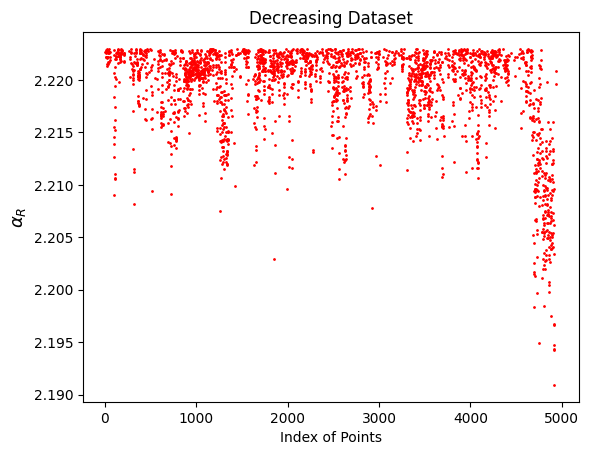

In [5]:
# Leave the ones above baseline out -- because we are interested in the reduction of value
pts_minimize = data[data.αR < regression_DB2.params[5] ]
pts_minimize = pts_minimize.sort_values("αR", ascending=True)

plt.scatter(pts_minimize.ind, pts_minimize.αR, s=1, c="r")
plt.title("Decreasing Dataset")
plt.xlabel("Index of Points")
plt.ylabel("$\\alpha_R$", fontsize=13);

In [6]:
ids = pts_minimize.id_added.values
R_dec = R[R.id.isin(ids)]
R_dec = R_dec[["TAUTH"] + coeffs + ["id"]] 

In [7]:
regression_dec = get_regression_np(R_dec)[1]
regression_dec.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     7863.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:15:38   Log-Likelihood:                 645.21
No. Observations:                3854   AIC:                            -1272.
Df Residuals:                    3845   BIC:                            -1216.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3768      0.033    -71.522      0.000      -2.442      -2.312
x1             1.2642      0.020     63.580      0.000       1.225       1.303
x2             0.0818      0.017      4.845      0.000       0.049       0.115
x3             0.0095      0.012      0.771      0.441      -0.015       0.034
x4            -0.6264      0.010    -63.072      0.000      -0.646      -0.607
x5             1.0538      0.032     33.370      0.000       0.992       1.116
x6             0.2168      0.033      6.487      0.000       0.151       0.282
x7            -0.2248      0.043     -5.169      0.000      -0.310      -0.140
x8             0.1628      0.024      6.846      0.000       0.116       0.209
==============================================================================
Omnibus:                       12.914   Durbin-Watson:                   0.566
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.238
Skew:                          -0.034   Prob(JB):                     0.000298
Kurtosis:                       3.311   Cond. No.                         58.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Analysis for the Partial Decreased Dataset -- Ranged Dataset

In [8]:
# Ordering R_dec dataset

dict_ordered_vals = dict(zip( ids, list(range(len(pts_minimize)))  ) )

R_dec["ordered"] = R_dec.id.map(dict_ordered_vals)
R_dec = R_dec.sort_values("ordered")
R_dec = R_dec.set_index("ordered")

In [9]:
reg_coeff_per_pts = np.zeros(len(pts_minimize))
for i in range(1, len(pts_minimize) + 1):
    R___ = R_dec.iloc[:i][["TAUTH"] + coeffs]
    regression___ = get_regression_np(R___)[1]
    reg_coeff_per_pts[i-1] = regression___.params[5]

<IPython.core.display.Javascript object>


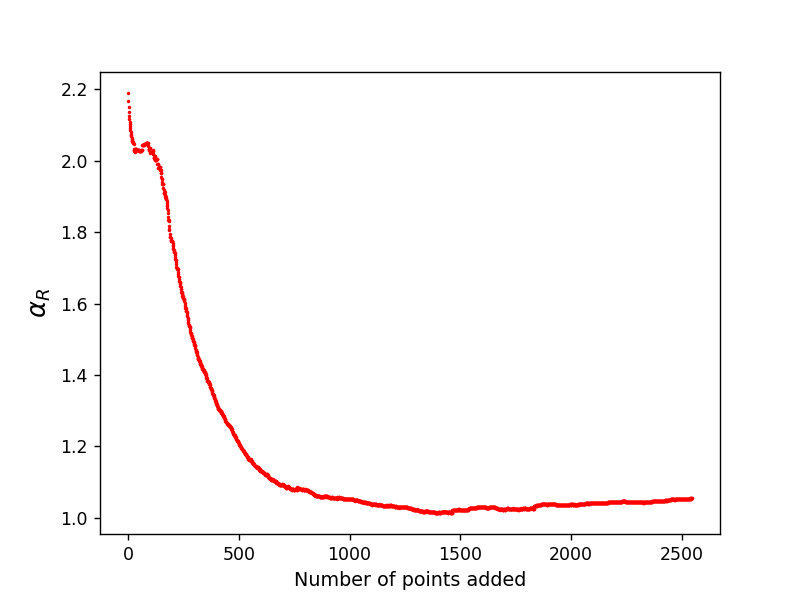

In [22]:
num_pts_add = list(range(1,len(pts_minimize) + 1))

%matplotlib notebook

plt.scatter(num_pts_add, reg_coeff_per_pts, s=1, c = "r")
plt.xlabel("Number of points added", fontsize=11)
plt.ylabel("$\\alpha_R$", fontsize=15);

### From all the points of the line above, store all the ones that decreased $\alpha_R$ after they were added.

In [11]:
reducing_pts_αR = [reg_coeff_per_pts[0]]
for i in range(1,len(reg_coeff_per_pts)-1):
    if reg_coeff_per_pts[i-1] > reg_coeff_per_pts[i]:
        reducing_pts_αR.append(reg_coeff_per_pts[i])
        
s = pd.Series(reg_coeff_per_pts)
reducing_pts_idx = s[s.isin(reducing_pts_αR)].index

In [12]:
len(s), len(reducing_pts_idx)

(2544, 1486)

### Applying Analysis of Influential Pts to the selected range 

In [13]:
range_of_analysis = reducing_pts_idx.copy()
R_range = R_dec[R_dec.index.isin(range_of_analysis)]
R_range = (R_range[["TAUTH"] + coeffs + ["id"]]).reset_index(drop=True)

ranged_data = pd.concat([DB2[["TAUTH"] + coeffs + ["id"]], 
                         R_range[["TAUTH"] + coeffs + ["id"]]], 
                        axis=0, ignore_index=True
                       )
ranged_data

,TAUTH,IP,BT,NEL,PLTH,RGEO,KAREA,EPS,MEFF,id
0,-2.975930,-1.217734,0.790728,1.332102,0.625938,0.527093,-0.025523,-1.418447,0.405465,HDULEH
1,-3.015527,-1.220102,0.790728,1.317480,0.705076,0.521172,-0.027988,-1.409604,0.405465,NAC6N1
2,-2.752786,-1.213686,0.790728,1.226712,0.123986,0.526502,-0.010556,-1.432100,0.405465,U2T1C7
3,-2.660547,-1.217734,0.790728,1.328400,0.319181,0.526502,-0.025933,-1.417369,0.405465,422XQB
4,-2.965979,-1.223495,0.790274,1.347294,0.709513,0.521766,-0.031387,-1.406800,0.405465,WZ9FED
...,...,...,...,...,...,...,...,...,...,...
2791,-1.875118,0.321412,0.637690,1.024189,2.287512,1.067620,0.420373,-1.146581,0.659785,G8OILS
2792,-2.433833,-0.000800,0.902192,2.094084,1.785070,0.487352,0.448525,-1.148420,0.693147,ST5FL8
2793,-2.723113,-0.222769,0.904623,1.707290,1.501853,0.498955,0.432432,-1.200135,0.693147,G8PHEQ
2794,-1.757736,0.318147,0.525123,1.078768,2.064701,1.065244,0.414538,-1.138633,0.127254,K3O76W


In [14]:
Y_range = ranged_data[["TAUTH"]].to_numpy()

# Adding a column for the intercept
x_df = ranged_data[coeffs]
x_df.insert(loc = 0, column = "intercept", value = np.ones(len(x_df)))
X_range = x_df.to_numpy()

n_rng, p_rng = X_range.shape

model_range = sm.OLS(Y_range,X_range)
regression_range = model_range.fit()


regression_range.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     5422.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:15:51   Log-Likelihood:                 452.67
No. Observations:                2796   AIC:                            -887.3
Df Residuals:                    2787   BIC:                            -833.9
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2798      0.037    -60.861      0.000      -2.353      -2.206
x1             1.4158      0.022     64.323      0.000       1.373       1.459
x2             0.0284      0.020      1.438      0.150      -0.010       0.067
x3            -0.1323      0.015     -8.997      0.000      -0.161      -0.103
x4            -0.5320      0.012    -45.133      0.000      -0.555      -0.509
x5             0.6558      0.037     17.770      0.000       0.583       0.728
x6             0.0091      0.037      0.244      0.807      -0.064       0.082
x7            -0.5508      0.048    -11.567      0.000      -0.644      -0.457
x8             0.1324      0.026      5.154      0.000       0.082       0.183
==============================================================================
Omnibus:                       34.539   Durbin-Watson:                   1.273
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.020
Skew:                          -0.003   Prob(JB):                     9.27e-14
Kurtosis:                       3.718   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Gemeral analysis of influential points for the ranged-decreased dataset.

#### What are influential points?  [Francis Adrian Viernes](https://towardsdatascience.com/linear-regression-models-and-influential-points-4ee844adac6d)

"Influential points are those that affect the most the regression's parameters. Not all points are influential; nor all outliers are influential. An influential point is said to have high leverage and high residual. 

**Leverage** is the measure of how far the value of a predictor variable is from the mean of that variable. An observation is said to have high leverage if the value of the predictor variable is unusual and far from the rest." 

Mathematically, the leverage of a point $i$-th is the $i$-th diagonal element $h_i$ of the OLS projection matrix; namely:

$$
    H = X(X^TX)^{-1}X^T
$$

Thus

$$
h_i = H_{ii} = x_i^T(X^TX)^{-1}x_i
$$

A point is said to have high leverage if: $h_i > 2p/n$. where $p$ is the dimension of the data and $n$ is the total number of observations [David A. Belsey, Edwin Kuh, and Roy E. Welsch, Regression Diagnostics (Wiley, 1980)]. 

**Studentized Residuals** are based in the leave-one-out variance [`statsmodels.resid_studentized_external`](https://www.statsmodels.org/dev/generated/statsmodels.stats.outliers_influence.OLSInfluence.resid_studentized_external.html). 

Studentized Residuals: $r_i = E_i/s_{e_i}$. Where $E_i$ is the $i$-th element of the residual $E = Y- \hat{\beta}X$; and ${\beta}$ is the optimal parameters for the given dataset. $s_{e_i}$ is defined as

$$
    s_{e_i} = \sqrt{s^2(1-h_{ii})} \:\: \rightarrow \:\: r^*_i = \frac{e_i}{s(i)\sqrt{1-h_{ii}}}
$$

With $s^2(i)$ being the mean squared error when the $i-th$ row is omitted in fitting the regressio function. This follows the t-distribution with $n-p-1$ degrees of freedom; with specific assumptions. [David A. Belsey, Edwin Kuh, and Roy E. Welsch, Regression Diagnostics (Wiley, 1980)]. 

In [15]:
influence_ranged = regression_range.get_influence()
infl_summary_range = influence_ranged.summary_frame()

In [16]:
student_resid_rng = influence_ranged.resid_studentized_external
leverage_rng = influence_ranged.hat_matrix_diag
cutoff_leverage_rng = ((2*p_rng)+2)/n_rng
cutoff_student_resid_rng = 2

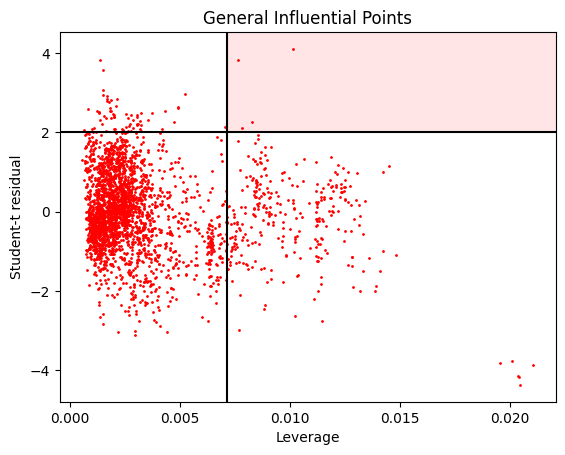

In [17]:
plt.scatter(leverage_rng, student_resid_rng, s=1, c="r")
plt.ylabel("Student-t residual")
plt.xlabel("Leverage")
plt.axvline(cutoff_leverage_rng, c="k")
plt.axhline(cutoff_student_resid_rng, c="k")

left, bottom, width, height = (cutoff_leverage_rng,
                               cutoff_student_resid_rng,
                               max(leverage_rng), 
                               max(student_resid_rng)
                              )
rect=mpatches.Rectangle((left,bottom),width,height, 
                        #fill=False,
                        alpha=0.1,
                       facecolor="red")
plt.gca().add_patch(rect)
plt.title("General Influential Points");

In [18]:
ge_infl_rng = (pd.DataFrame([leverage_rng,student_resid_rng]).T).rename(columns={0:"leverage",1:"t_resid"})
ge_infl_rng = ge_infl_rng[ge_infl_rng.leverage > cutoff_leverage_rng]
ge_infl_rng = ge_infl_rng[ge_infl_rng.t_resid  > cutoff_student_resid_rng]

# Influential points found from DB5 dataset
ge_infl_DB5_rng = ge_infl_rng[ge_infl_rng.index  >= len(DB2)]
infl_DB5_ids_rng = ranged_data[ranged_data.index.isin(ge_infl_DB5_rng.index)].id.values

In [19]:
# Getting both DataFrames together: influential | for high alpha_R

R_infl =  R_range[R_range.id.isin(infl_DB5_ids_rng)]

regression_infl = get_regression_np(R_infl)[1]
regression_infl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     5634.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:15:59   Log-Likelihood:                 561.50
No. Observations:                1311   AIC:                            -1105.
Df Residuals:                    1302   BIC:                            -1058.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.9628      0.048    -61.834      0.000      -3.057      -2.869
x1             0.7865      0.025     30.948      0.000       0.737       0.836
x2             0.3013      0.027     11.094      0.000       0.248       0.355
x3             0.4310      0.020     21.829      0.000       0.392       0.470
x4            -0.6657      0.013    -51.071      0.000      -0.691      -0.640
x5             2.2018      0.050     44.274      0.000       2.104       2.299
x6             0.3809      0.040      9.419      0.000       0.302       0.460
x7             0.5827      0.051     11.486      0.000       0.483       0.682
x8             0.1827      0.030      6.083      0.000       0.124       0.242
==============================================================================
Omnibus:                       41.690   Durbin-Watson:                   0.798
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               86.662
Skew:                          -0.178   Prob(JB):                     1.52e-19
Kurtosis:                       4.208   Cond. No.                         50.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
# Getting both DataFrames together: not influential | For low alpha_R
R_not_infl__ =  R_range[~R_range.id.isin(infl_DB5_ids_rng)]

regression_not_infl = get_regression_np(R_not_infl__)[1]
regression_not_infl.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.940
Method:                 Least Squares   F-statistic:                     5429.
Date:                Thu, 23 Feb 2023   Prob (F-statistic):               0.00
Time:                        14:15:59   Log-Likelihood:                 454.57
No. Observations:                2795   AIC:                            -891.1
Df Residuals:                    2786   BIC:                            -837.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.2829      0.037    -60.947      0.000      -2.356      -2.209
x1             1.4164      0.022     64.394      0.000       1.373       1.460
x2             0.0294      0.020      1.487      0.137      -0.009       0.068
x3            -0.1325      0.015     -9.015      0.000      -0.161      -0.104
x4            -0.5321      0.012    -45.178      0.000      -0.555      -0.509
x5             0.6556      0.037     17.778      0.000       0.583       0.728
x6             0.0088      0.037      0.236      0.813      -0.064       0.082
x7            -0.5535      0.048    -11.628      0.000      -0.647      -0.460
x8             0.1322      0.026      5.150      0.000       0.082       0.183
==============================================================================
Omnibus:                       34.022   Durbin-Watson:                   1.274
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               58.831
Skew:                          -0.002   Prob(JB):                     1.68e-13
Kurtosis:                       3.711   Cond. No.                         53.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
""" INCLUSION OF FIRST PART

1486: 0.6558: sr=3: lf=*1
1486: 0.6558: sr=2.5: lf=*1
1485: 0.6556: sr=2: lf=*1    ***********
1485: 0.6556: sr=2: lf=*0.8
1485: 0.6556: sr=2: lf=*0.5
1464: 0.6876: sr=2: lf=*0.2
1483: 0.6566: sr=1.8: lf=*1
1479: 0.6596: sr=1.5: lf=*1
1470: 0.6636: sr=1.2: lf=*1
1468: 0.6649: sr=1: lf=*1
1443: 0.6784: sr=0.5: lf=*1
1408: 0.6757: sr=0.3: lf=*0.5
"""

len(R_not_infl__)

1485